In [25]:
import sys
sys.path.append('../..')

In [26]:
import typing
import numpy
import matplotlib.pyplot

In [27]:
# import eaglecore.io
import eaglecore.filters.linear
import eaglecore.noise
import eaglecore.types
# import eaglecore.filters.nolinear
# import eaglecore.metrics

$\begin{align}
f'(x_{0}) 
&= \lim\limits_{h \rightarrow 0}\frac{f(x_{0}+h) - f(x_{0})}{h} \\
&= \lim\limits_{x_{1} \rightarrow x_{0}}\frac{f(x_{1}) - f(x_{0})}{x_{1}- x_{0}}
\end{align}$

In [28]:
def squarred(
    x: typing.Union[numpy.ndarray, float]
) -> typing.Union[numpy.ndarray, float]:
    return x ** 2


def mean_value_theorem(
    f: typing.Callable[[float], float], 
    x: float, 
    h: float
) -> float:
    # Lagrange theorem
    return ( f(x+h) - f(x) ) / h


def compute_tangent(
    f: typing.Callable[[float], float], 
    x: float, 
    h: float
) -> typing.Tuple[float, float]:
    # f(x) = x²
    # Tangente in z : g(x) = a x + b = f'(z) x + b
    # Compute b : g(z) = f(z) <=> f'(z) z + b = f(z) <=> b = f(z) - f'(z) z
        
    a = mean_value_theorem(f, x, h)
    b = f(x) - a * x
    
    return a, b


def approx_mean_value_theorem(
    fx: numpy.ndarray, 
    x: numpy.ndarray,  
    i: int, 
    step: int = 1
) -> float:
    # Lagrange theorem
    return ( fx[i+step] - fx[i] ) / (x[i+step] - x[i])  


def approx_compute_tangent(
    fx: numpy.ndarray, 
    x: numpy.ndarray, 
    i: int, 
    step: int = 1
) -> typing.Tuple[float, float]:
    # f(x) = x²
    # Tangente in z : g(x) = a x + b = f'(z) x + b
    # Compute b : g(z) = f(z) <=> f'(z) z + b = f(z) <=> b = f(z) - f'(z) z
    
    a = approx_mean_value_theorem(fx, x, i, step)
    b = fx[i] - a * x[i]
    
    return a, b

In [29]:
x = numpy.arange(start = -1/2, stop = 1/2, step = 1/100) * 12
fx = squarred(x)

fx_noised = eaglecore.noise.awgn(
    signal = fx,
    snr = eaglecore.types.snr_db(20)
)

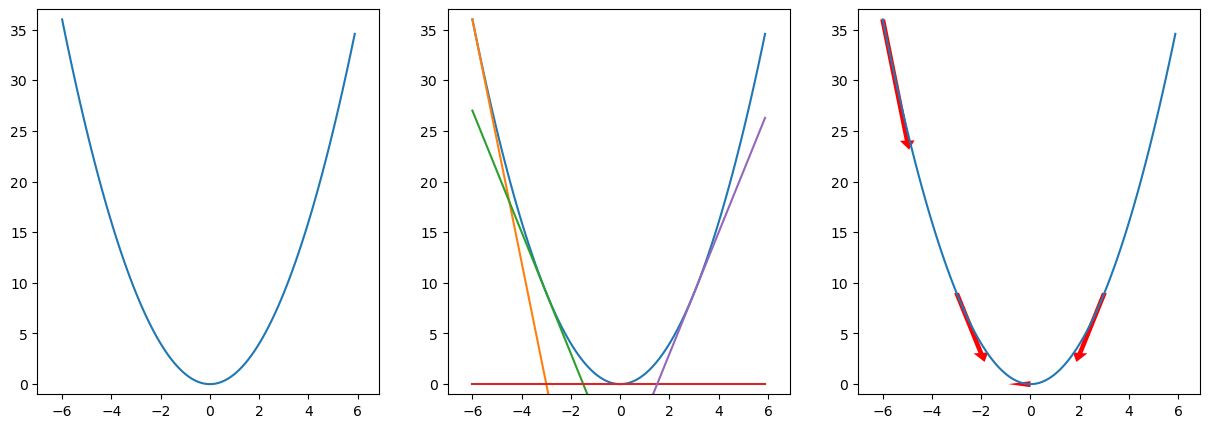

In [30]:
NB_TANGENT = 4 

_ = matplotlib.pyplot.figure(figsize=(15, 5))

# -------------------------------------------------------

_ = matplotlib.pyplot.subplot(1, 3, 1)
_ = matplotlib.pyplot.plot(x, fx)
_ = matplotlib.pyplot.xlim(x.min()-1, x.max()+1)
_ = matplotlib.pyplot.ylim(fx.min()-1, fx.max()+1) 

# -------------------------------------------------------

_ = matplotlib.pyplot.subplot(1, 3, 2)
_ = matplotlib.pyplot.plot(x, fx)
for xi in x[::x.shape[0] // NB_TANGENT]:
    a, b = compute_tangent(f = squarred, x = xi, h = 1e-9)
    tangente = lambda x : a * x + b
    _ = matplotlib.pyplot.plot(x, tangente(x))

_ = matplotlib.pyplot.xlim(x.min()-1, x.max()+1)
_ = matplotlib.pyplot.ylim(fx.min()-1, fx.max()+1) 

# -------------------------------------------------------

_ = matplotlib.pyplot.subplot(1, 3, 3)
_ = matplotlib.pyplot.plot(x, fx)
for xi in x[::x.shape[0] // NB_TANGENT]:
    
    a, b = compute_tangent(f = squarred, x = xi, h = 1e-9)
    tangente = lambda x : a * x + b
    
    x_, y_ = 0, tangente(0)
    p0 = numpy.array([ x_, y_ ])
    p1 = numpy.array([ x_+1, tangente(x_+1) ])
    v = p1 - p0
    vn = v / numpy.sqrt((v**2).sum())
    
    p = numpy.array([xi, tangente(xi)])
    _ = matplotlib.pyplot.arrow(*p, *(-a*vn), width=0.2, linewidth=0, color='red')
    
_ = matplotlib.pyplot.xlim(x.min()-1, x.max()+1)
_ = matplotlib.pyplot.ylim(fx.min()-1, fx.max()+1) 

# ------------------------------------------------------- 

_ = matplotlib.pyplot.show()
_ = matplotlib.pyplot.close()

p0 : [0.         4.44874698]
p1 : [ 1.         -0.58992204]
v : [ 1.         -5.03866902]
vn : [ 0.1946683  -0.98086913]
-a : 5.038669015423139
-a vn : [ 0.98086913 -4.9422749 ]

p0 : [ 0.         49.91787806]
p1 : [ 1.         58.36101878]
v : [1.         8.44314071]
vn : [0.11761725 0.993059  ]
-a : -8.443140712690122
-a vn : [-0.993059   -8.38453689]

p0 : [ 0.         -2.28321013]
p1 : [ 1.         -4.68656561]
v : [ 1.         -2.40335548]
vn : [ 0.38415769 -0.9232675 ]
-a : 2.4033554846665193
-a vn : [ 0.9232675 -2.21894  ]

p0 : [0.         2.67778168]
p1 : [ 1.       13.673322]
v : [ 1.         10.99554032]
vn : [0.09057217 0.99588989]
-a : -10.995540316366435
-a vn : [ -0.99588989 -10.95034749]



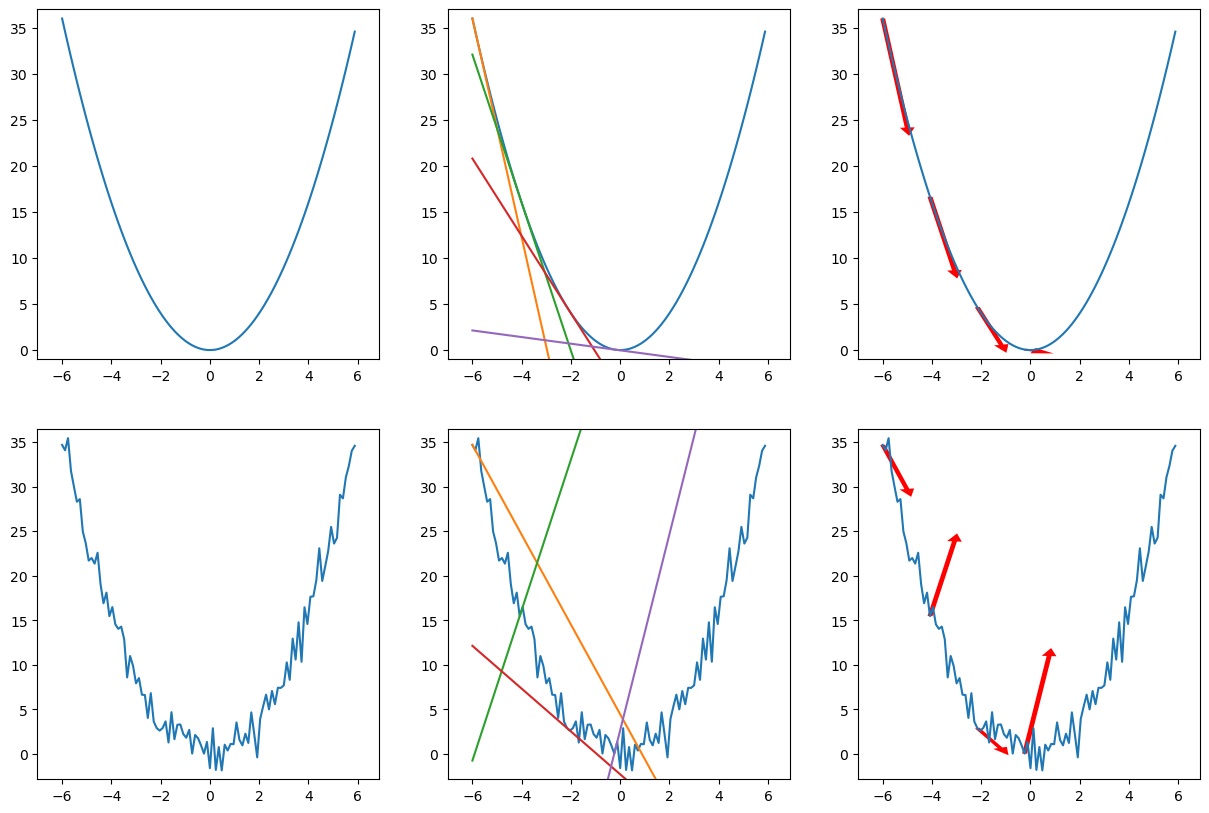

In [40]:
NB_TANGENT = 4

_ = matplotlib.pyplot.figure(figsize=(15, 10))

# ------------------------------------------------------- 

_ = matplotlib.pyplot.subplot(2, 3, 1)
_ = matplotlib.pyplot.plot(x, fx)
_ = matplotlib.pyplot.xlim(x.min()-1, x.max()+1)
_ = matplotlib.pyplot.ylim(fx.min()-1, fx.max()+1) 

# x, y = 0, 0
# dx, dy = 1, 1
# _ = matplotlib.pyplot.arrow(0, 0, 5, 5, width=0.08)
# plt.annotate('General direction', xy = (3.4, 17))

# _ = matplotlib.pyplot.subplot(2, 2, 2)
# _ = matplotlib.pyplot.plot(x, fx_noised)

# ------------------------------------------------------- 

_ = matplotlib.pyplot.subplot(2, 3, 2)
_ = matplotlib.pyplot.plot(x, fx)

for i in range(0, x.shape[0] // 2, (x.shape[0] // 2) // (NB_TANGENT-1) ):

    a, b = approx_compute_tangent(fx = fx, x = x, i = i, step = 1)
    tangente = lambda t : a * t + b
    
    x__, y__ = x, tangente(x)
    _ = matplotlib.pyplot.plot(x__, y__)
    
_ = matplotlib.pyplot.xlim(x.min()-1, x.max()+1)
_ = matplotlib.pyplot.ylim(fx.min()-1, fx.max()+1)

# ------------------------------------------------------- 

_ = matplotlib.pyplot.subplot(2, 3, 3)
_ = matplotlib.pyplot.plot(x, fx)

for i in range(0, x.shape[0] // 2, (x.shape[0] // 2) // (NB_TANGENT-1) ):

    a, b = approx_compute_tangent(fx = fx, x = x, i = i, step = 1)
    tangente = lambda t : a * t + b
    
    x_, y_ = 0, tangente(0)
    p0 = numpy.array([ x_, y_ ])
    p1 = numpy.array([ x_+1, tangente(x_+1) ])
    v = p1 - p0
    vn = v / numpy.sqrt((v**2).sum())
    
    p = numpy.array([x[i], tangente(x[i])])
    _ = matplotlib.pyplot.arrow(*p, *(-a*vn), width=0.2, linewidth=0, color='red')
    

_ = matplotlib.pyplot.xlim(x.min()-1, x.max()+1)
_ = matplotlib.pyplot.ylim(fx.min()-1, fx.max()+1)

# ------------------------------------------------------- 

_ = matplotlib.pyplot.subplot(2, 3, 4)
_ = matplotlib.pyplot.plot(x, fx_noised)
_ = matplotlib.pyplot.xlim(x.min()-1, x.max()+1)
_ = matplotlib.pyplot.ylim(fx_noised.min()-1, fx_noised.max()+1) 

# ------------------------------------------------------- 

_ = matplotlib.pyplot.subplot(2, 3, 5)
_ = matplotlib.pyplot.plot(x, fx_noised)

for i in range(0, x.shape[0] // 2, (x.shape[0] // 2) // (NB_TANGENT-1) ):

    a, b = approx_compute_tangent(fx = fx_noised, x = x, i = i, step = 1)
    tangente = lambda t : a * t + b
    
    x__, y__ = x, tangente(x)
    _ = matplotlib.pyplot.plot(x__, y__)
    
_ = matplotlib.pyplot.xlim(x.min()-1, x.max()+1)
_ = matplotlib.pyplot.ylim(fx_noised.min()-1, fx_noised.max()+1)

# ------------------------------------------------------- 

_ = matplotlib.pyplot.subplot(2, 3, 6)
_ = matplotlib.pyplot.plot(x, fx_noised)

for i in range(0, x.shape[0] // 2, (x.shape[0] // 2) // (NB_TANGENT-1) ):

    a, b = approx_compute_tangent(fx = fx_noised, x = x, i = i, step = 1)
    tangente = lambda t : a * t + b
    
    x_, y_ = 0, tangente(0)
    p0 = numpy.array([ x_, y_ ])
    p1 = numpy.array([ x_+1, tangente(x_+1) ])
    v = p1 - p0
    vn = v / numpy.sqrt((v**2).sum())
    
    # print(p0, p1, p1 - p0, a, vn, -a*vn)
    p = numpy.array([x[i], tangente(x[i])])
    
    _ = matplotlib.pyplot.arrow(*p, *(abs(a) * vn), width=0.2, linewidth=0, color='red')
    
    print("p0 : {}".format(p0))
    print("p1 : {}".format(p1))
    print("v : {}".format(v))
    print("vn : {}".format(vn))
    print("-a : {}".format(-a))
    print("-a vn : {}".format(-a*vn))
    print()
    
    
    
    # dx, dy = -a*vn
    # dx = numpy.abs(dx)
    
    # _ = matplotlib.pyplot.arrow(*p, dx, dy, width=0.2, linewidth=0, color='red')
    
    
    

_ = matplotlib.pyplot.xlim(x.min()-1, x.max()+1)
_ = matplotlib.pyplot.ylim(fx_noised.min()-1, fx_noised.max()+1)

# ------------------------------------------------------- 
# _ = matplotlib.pyplot.subplot(2, 2, 4)
# _ = matplotlib.pyplot.plot(x, fx_noised)
# for i in range(0, x.shape[0], x.shape[0] // NB_TANGENT):
#     a, b = approx_compute_tangent(fx = fx_noised, x = x, i = i, step = 1)
#     tangente = lambda x : a * x + b
#     _ = matplotlib.pyplot.plot(x, tangente(x))
# _ = matplotlib.pyplot.xlim(x.min(), x.max())
# _ = matplotlib.pyplot.ylim(fx.min(), fx.max())    


_ = matplotlib.pyplot.show()
_ = matplotlib.pyplot.close()

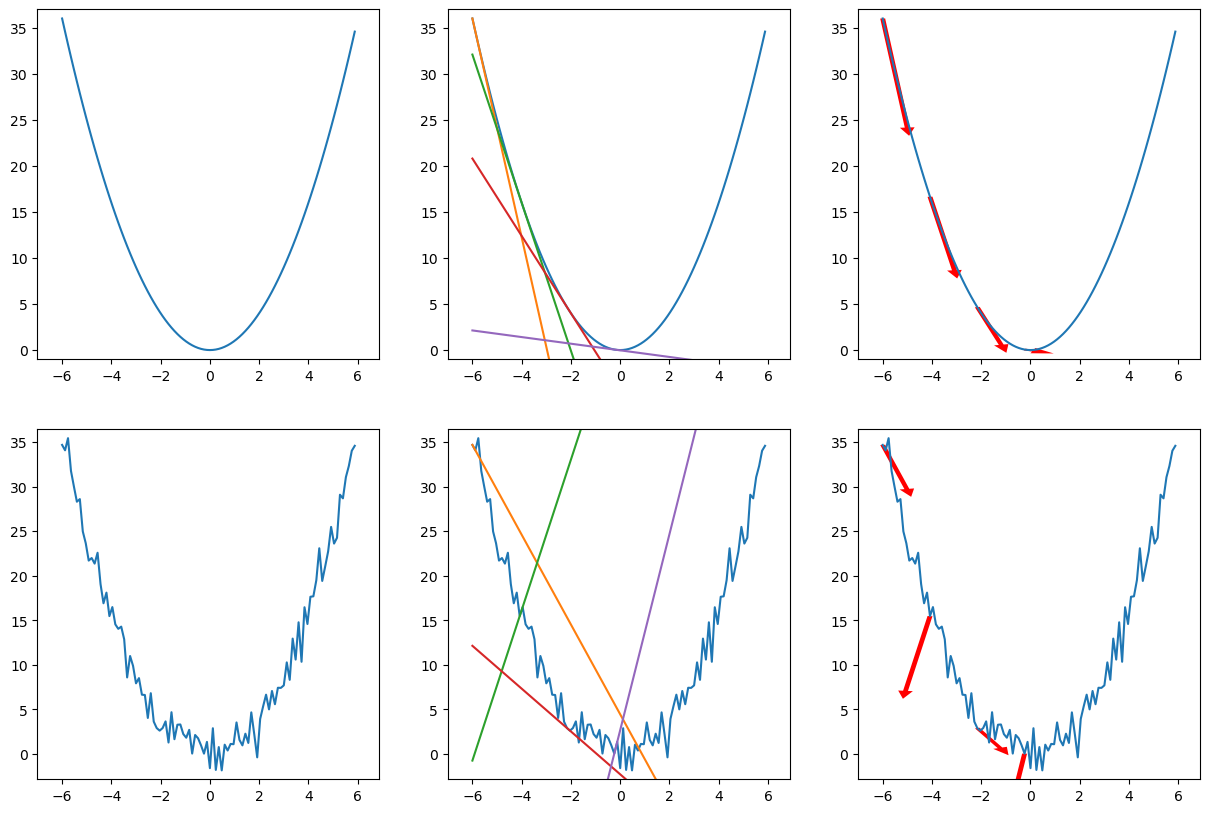

In [32]:
NB_TANGENT = 4

_ = matplotlib.pyplot.figure(figsize=(15, 10))

# ------------------------------------------------------- 

_ = matplotlib.pyplot.subplot(2, 3, 1)
_ = matplotlib.pyplot.plot(x, fx)
_ = matplotlib.pyplot.xlim(x.min()-1, x.max()+1)
_ = matplotlib.pyplot.ylim(fx.min()-1, fx.max()+1) 

# x, y = 0, 0
# dx, dy = 1, 1
# _ = matplotlib.pyplot.arrow(0, 0, 5, 5, width=0.08)
# plt.annotate('General direction', xy = (3.4, 17))

# _ = matplotlib.pyplot.subplot(2, 2, 2)
# _ = matplotlib.pyplot.plot(x, fx_noised)

# ------------------------------------------------------- 

_ = matplotlib.pyplot.subplot(2, 3, 2)
_ = matplotlib.pyplot.plot(x, fx)

for i in range(0, x.shape[0] // 2, (x.shape[0] // 2) // (NB_TANGENT-1) ):

    a, b = approx_compute_tangent(fx = fx, x = x, i = i, step = 1)
    tangente = lambda t : a * t + b
    
    x__, y__ = x, tangente(x)
    _ = matplotlib.pyplot.plot(x__, y__)
    
_ = matplotlib.pyplot.xlim(x.min()-1, x.max()+1)
_ = matplotlib.pyplot.ylim(fx.min()-1, fx.max()+1)

# ------------------------------------------------------- 

_ = matplotlib.pyplot.subplot(2, 3, 3)
_ = matplotlib.pyplot.plot(x, fx)

for i in range(0, x.shape[0] // 2, (x.shape[0] // 2) // (NB_TANGENT-1) ):

    a, b = approx_compute_tangent(fx = fx, x = x, i = i, step = 1)
    tangente = lambda t : a * t + b
    
    x_, y_ = 0, tangente(0)
    p0 = numpy.array([ x_, y_ ])
    p1 = numpy.array([ x_+1, tangente(x_+1) ])
    v = p1 - p0
    vn = v / numpy.sqrt((v**2).sum())
    
    p = numpy.array([x[i], tangente(x[i])])
    _ = matplotlib.pyplot.arrow(*p, *(-a*vn), width=0.2, linewidth=0, color='red')
    

_ = matplotlib.pyplot.xlim(x.min()-1, x.max()+1)
_ = matplotlib.pyplot.ylim(fx.min()-1, fx.max()+1)

# ------------------------------------------------------- 

_ = matplotlib.pyplot.subplot(2, 3, 4)
_ = matplotlib.pyplot.plot(x, fx_noised)
_ = matplotlib.pyplot.xlim(x.min()-1, x.max()+1)
_ = matplotlib.pyplot.ylim(fx_noised.min()-1, fx_noised.max()+1) 

# ------------------------------------------------------- 

_ = matplotlib.pyplot.subplot(2, 3, 5)
_ = matplotlib.pyplot.plot(x, fx_noised)

for i in range(0, x.shape[0] // 2, (x.shape[0] // 2) // (NB_TANGENT-1) ):

    a, b = approx_compute_tangent(fx = fx_noised, x = x, i = i, step = 1)
    tangente = lambda t : a * t + b
    
    x__, y__ = x, tangente(x)
    _ = matplotlib.pyplot.plot(x__, y__)
    
_ = matplotlib.pyplot.xlim(x.min()-1, x.max()+1)
_ = matplotlib.pyplot.ylim(fx_noised.min()-1, fx_noised.max()+1)

# ------------------------------------------------------- 

_ = matplotlib.pyplot.subplot(2, 3, 6)
_ = matplotlib.pyplot.plot(x, fx_noised)

for i in range(0, x.shape[0] // 2, (x.shape[0] // 2) // (NB_TANGENT-1) ):

    a, b = approx_compute_tangent(fx = fx_noised, x = x, i = i, step = 1)
    tangente = lambda t : a * t + b
    
    x_, y_ = 0, tangente(0)
    p0 = numpy.array([ x_, y_ ])
    p1 = numpy.array([ x_+1, tangente(x_+1) ])
    v = p1 - p0
    vn = v / numpy.sqrt((v**2).sum())
    
    # print(p0, p1, p1 - p0, a, vn, -a*vn)
    p = numpy.array([x[i], tangente(x[i])])
    
    _ = matplotlib.pyplot.arrow(*p, *(-a*vn), width=0.2, linewidth=0, color='red')
    

_ = matplotlib.pyplot.xlim(x.min()-1, x.max()+1)
_ = matplotlib.pyplot.ylim(fx_noised.min()-1, fx_noised.max()+1)

# ------------------------------------------------------- 
# _ = matplotlib.pyplot.subplot(2, 2, 4)
# _ = matplotlib.pyplot.plot(x, fx_noised)
# for i in range(0, x.shape[0], x.shape[0] // NB_TANGENT):
#     a, b = approx_compute_tangent(fx = fx_noised, x = x, i = i, step = 1)
#     tangente = lambda x : a * x + b
#     _ = matplotlib.pyplot.plot(x, tangente(x))
# _ = matplotlib.pyplot.xlim(x.min(), x.max())
# _ = matplotlib.pyplot.ylim(fx.min(), fx.max())    


_ = matplotlib.pyplot.show()
_ = matplotlib.pyplot.close()